In [2]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [3]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(k, v.shape)


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [4]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]


tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

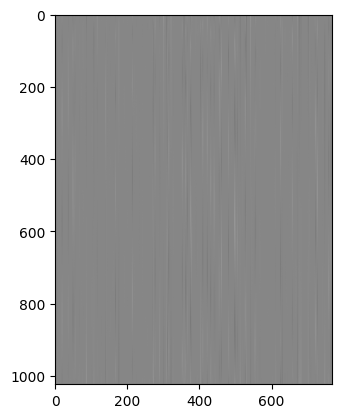

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

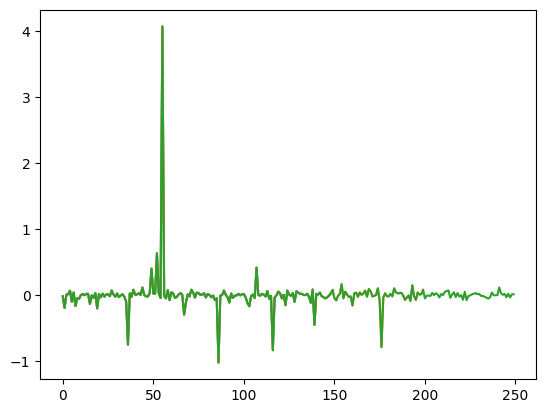

In [7]:
plt.plot(sd_hf["transformer.wpe.weight"][0, :150])
plt.plot(sd_hf["transformer.wpe.weight"][0, :200])
plt.plot(sd_hf["transformer.wpe.weight"][0, :250])


In [8]:
from transformers import pipeline, set_seed

generator = pipeline("text-generation", model="gpt2")
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)



Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello, I\'m a language model, so I can write things that are easy to understand with help of my programming language."\n\nHowever, this'},
 {'generated_text': "Hello, I'm a language model, you understand me, so when you're doing something you've written in Java, and then you want to add"},
 {'generated_text': "Hello, I'm a language model, but the whole point in programming is to be able to do things like iterate, which lets you make code"},
 {'generated_text': "Hello, I'm a language model, and this is where you can put your software in production and get all the performance, it's a real joy"},
 {'generated_text': "Hello, I'm a language model, but I couldn't write a script to play C# in JavaScript. I couldn't draw sprites in HTML..."}]